In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from datetime import date
import function as fun

# # Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (9, -55)
lng_range = (-33, -81)

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-55.000, high=9.000, size=1500)
lngs = np.random.uniform(low=-81.000, high=-33.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

547

In [6]:
# build URL to make API call based on weather data from 1/1/2008 - 12/1/2010
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&type=hour&start={1199145600}&end={1293753600}&q="

# Create the Lists to be used in the Dictionary for the Data Frame
name = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
min_temp = []
wind_speed = []
counter = 0

# Loop through the entire list of cities and request data for each city
for city in cities:
    try:
        city_response = requests.get(query_url + city).json()
        name.append(city_response['name'])
        country.append(city_response['sys']['country'])
        date.append(city_response['dt'])
        humidity.append(city_response['main']['humidity'])
        lat.append(city_response['coord']['lat'])
        lng.append(city_response['coord']['lon'])
        max_temp.append(city_response['main']['temp_max'])
        min_temp.append(city_response['main']['temp_min'])
        wind_speed.append(city_response['wind']['speed'])
        counter += 1
        print(f"Processing Request {counter} | {city}")
        time.sleep(2)
    except Exception:
        print(f"City not found -- Skipping: {city}")

Processing Request 1 | rawson
Processing Request 2 | punta arenas
Processing Request 3 | gilbues
Processing Request 4 | alta floresta
Processing Request 5 | mar del plata
Processing Request 6 | viedma
Processing Request 7 | inirida
Processing Request 8 | itarema
Processing Request 9 | sao miguel do araguaia
Processing Request 10 | cidreira
Processing Request 11 | lincoln
Processing Request 12 | taltal
Processing Request 13 | labrea
Processing Request 14 | arraial do cabo
Processing Request 15 | challapata
Processing Request 16 | morrope
Processing Request 17 | sao joao da barra
Processing Request 18 | conceicao da barra
Processing Request 19 | sao manuel
Processing Request 20 | pacora
Processing Request 21 | mitu
Processing Request 22 | castro
Processing Request 23 | cravo norte
Processing Request 24 | requena
Processing Request 25 | antequera
Processing Request 26 | cayenne
Processing Request 27 | la macarena
Processing Request 28 | boa vista
Processing Request 29 | vallenar
Processin

Processing Request 226 | san vicente de canete
Processing Request 227 | boca da mata
Processing Request 228 | calbuco
Processing Request 229 | varzea da palma
Processing Request 230 | san miguel
Processing Request 231 | grand-santi
Processing Request 232 | soure
Processing Request 233 | canutama
Processing Request 234 | sao joaquim
Processing Request 235 | itamarandiba
Processing Request 236 | puerto madryn
Processing Request 237 | goya
Processing Request 238 | camopi
Processing Request 239 | manacapuru
Processing Request 240 | centenario do sul
Processing Request 241 | minador do negrao
Processing Request 242 | jaguaribe
Processing Request 243 | arauco
Processing Request 244 | maues
Processing Request 245 | villa bruzual
Processing Request 246 | osorno
City not found -- Skipping: miranorte
Processing Request 247 | forquilhinha
Processing Request 248 | santa isabel do rio negro
Processing Request 249 | sao gabriel da cachoeira
Processing Request 250 | vilhena
Processing Request 251 | m

Processing Request 447 | santa cruz do rio pardo
Processing Request 448 | san pedro de uraba
Processing Request 449 | pinhao
Processing Request 450 | tuntum
City not found -- Skipping: nacunday
Processing Request 451 | ribeirao bonito
Processing Request 452 | itaueira
Processing Request 453 | skeldon
City not found -- Skipping: litoral del san juan
Processing Request 454 | cutervo
Processing Request 455 | ituango
Processing Request 456 | maraa
Processing Request 457 | chupaca
Processing Request 458 | arinos
Processing Request 459 | pirajui
Processing Request 460 | miranda
Processing Request 461 | san nicolas
Processing Request 462 | curaca
City not found -- Skipping: vreed en hoop
Processing Request 463 | san felipe
Processing Request 464 | terra nova
Processing Request 465 | olinda
Processing Request 466 | barranca de upia
Processing Request 467 | puerto maldonado
Processing Request 468 | jeremoabo
Processing Request 469 | abaete
Processing Request 470 | ataco
Processing Request 471 |

In [8]:
SA_list = pd.DataFrame(
    {'City': name,
     'Country': country,
     'Date': date,
     'Humidity': humidity,
     'Lat': lat,
     'Lng': lng,
     'Max Temp': max_temp,
     'Min Temp': min_temp,     
     'Wind Speed': wind_speed})
     
SA_list.head(100)

,City,Country,Date,Humidity,Lat,Lng,Max Temp,Min Temp,Wind Speed
0,Rawson,AR,1584367349,59,-43.30,-65.10,67.01,67.01,3.29
1,Punta Arenas,CL,1584367351,71,-53.15,-70.92,53.60,51.80,24.16
2,Gilbués,BR,1584367251,91,-9.83,-45.34,72.23,72.23,3.96
3,Alta Floresta,BR,1584367355,78,-9.88,-56.09,82.40,82.40,3.36
4,Mar del Plata,AR,1584367349,77,-38.00,-57.56,62.01,60.80,5.82
...,...,...,...,...,...,...,...,...,...
95,Fuerte Olimpo,PY,1584367594,38,-21.04,-57.87,98.33,98.33,5.21
96,Itanhaém,BR,1584367617,70,-24.18,-46.79,84.20,80.60,8.05
97,Benjamín Aceval,PY,1584367619,74,-24.97,-57.57,80.60,80.60,10.29
98,Florianópolis,BR,1584367621,74,-27.61,-48.50,88.00,82.40,3.36


In [10]:
# load new df to csv
SA_list.to_csv(r'~/Desktop/RiceData/Homework/Projects/Data-Analysis-Project-1/Data/Kati_Data/Data_Maps/SA_list.csv', index = False)

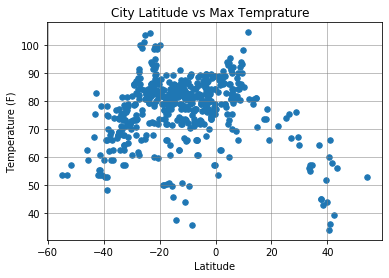

In [12]:
# create Lat vs. Max Temp correlation scatter plot
title = "City Latitude vs Max Temprature" + "  "
temp_plot = SA_list.plot.scatter(x='Lat',
                      y='Max Temp',s=30,title=title)
temp_plot.set_ylabel("Temperature (F)")
temp_plot.set_xlabel("Latitude")
temp_plot.grid(which='major', linestyle='-', linewidth='0.5', color='gray')

# output to png
plt.savefig('output_data/SA_lat_temp.png')

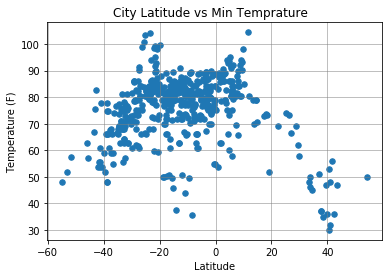

In [13]:
# create Lat vs. Min Temp correlation scatter plot
title = "City Latitude vs Min Temprature" + "  "
temp_plot = SA_list.plot.scatter(x='Lat',
                      y='Min Temp',s=30,title=title)
temp_plot.set_ylabel("Temperature (F)")
temp_plot.set_xlabel("Latitude")
temp_plot.grid(which='major', linestyle='-', linewidth='0.5', color='gray')

# output to png
plt.savefig('output_data/SA_lat_temp.png')

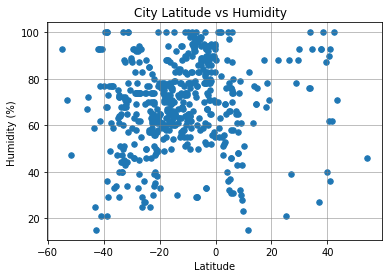

In [14]:
title = "City Latitude vs Humidity" + "  "
temp_plot = SA_list.plot.scatter(x='Lat',
                      y='Humidity',s=30,title=title)
temp_plot.set_ylabel("Humidity (%) ")
temp_plot.set_xlabel("Latitude")
temp_plot.grid(which='major', linestyle='-', linewidth='0.5', color='gray')

# output to png
plt.savefig('output_data/SA_lat_humidity.png')

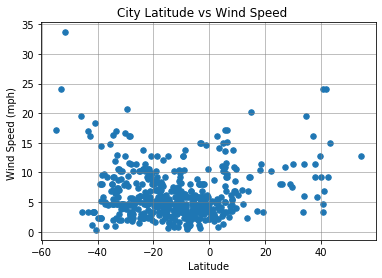

In [15]:
# create Lat vs. Wind Speed scatter plot
title = "City Latitude vs Wind Speed " + "  "
temp_plot = SA_list.plot.scatter(x='Lat',
                      y='Wind Speed',s=30,title=title)
temp_plot.set_ylabel("Wind Speed (mph) ")
temp_plot.set_xlabel("Latitude")
temp_plot.grid(which='major', linestyle='-', linewidth='0.5', color='gray')

# output to png
plt.savefig('output_data/SA_lat_windspeed.png')

## Linear Regression

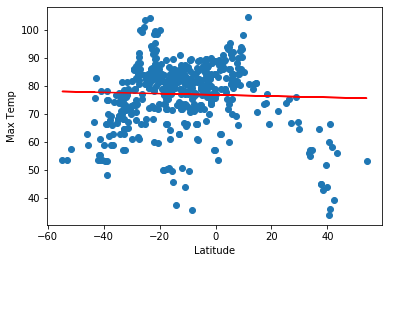

In [16]:
# create linear regressions for Northern Hemisphere - Max Temp vs. Latitude
x_values = SA_list['Lat']
y_values = SA_list['Max Temp']
fun.Lin_Reg(x_values,y_values,'Latitude','Max Temp')

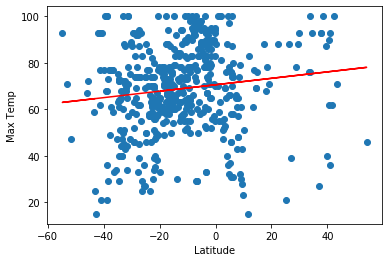

In [17]:
# create linear regressions for Humidity vs. Latitude
x_values = SA_list['Lat']
y_values = SA_list['Humidity']
fun.Lin_Reg(x_values,y_values,'Latitude','Max Temp')

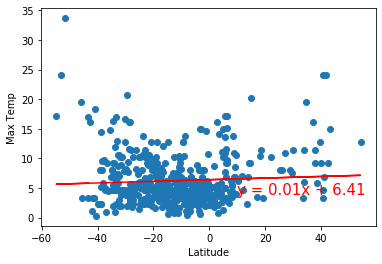

In [18]:
# create linear regressions for Wind Speed vs. Latitude
x_values = SA_list['Lat']
y_values = SA_list['Wind Speed']
fun.Lin_Reg(x_values,y_values,'Latitude','Max Temp')